In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import numpy as np
from matplotlib import pyplot as plt

In [3]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

In [15]:
Y_train = Y_train.reshape(60000, 1)
Y_test = Y_test.reshape(10000, 1)
X_train[0].shape

(28, 28)

In [14]:
X_train = tf.keras.utils.normalize(X_train)
X_test = tf.keras.utils.normalize(X_test)

In [53]:
model = Sequential([
    Conv2D(filters=16, kernel_size = (3,3), activation="relu", input_shape = (28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(filters=16, kernel_size = (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(32, activation="relu"),
    Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [54]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 24s 12ms/step - loss: 0.2589 - accuracy: 0.9196
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0884 - accuracy: 0.9726
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0658 - accuracy: 0.9793
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0528 - accuracy: 0.9832
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0437 - accuracy: 0.9860
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0375 - accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0321 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0285 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0255 - accuracy: 0.9918
Epoch 10/10
1875/1875 [==============================] - 19s 10ms/st

In [55]:
model.save("DigitsRecognizerCNN")

INFO:tensorflow:Assets written to: DigitsRecognizerCNN\assets


INFO:tensorflow:Assets written to: DigitsRecognizerCNN\assets


In [56]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0413 - accuracy: 0.9870


[0.04129961505532265, 0.9869999885559082]

In [57]:
pred = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


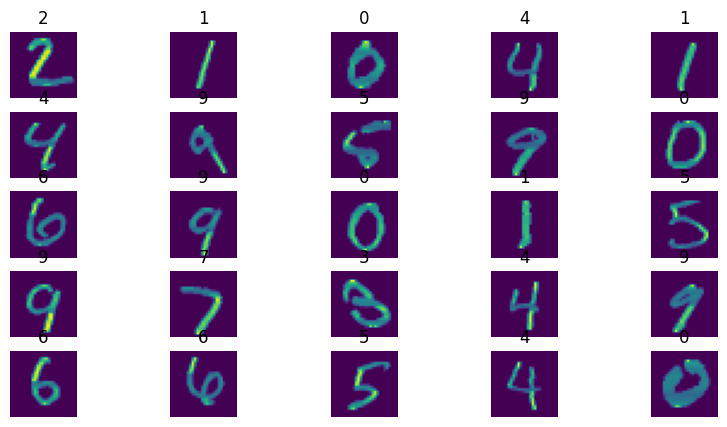

In [58]:
fig = plt.figure(figsize= (10, 5))
rows = 5
columns = 5
cnt = 1;
for i in range(25):
    fig.add_subplot(rows, columns, cnt)
    ans = np.argmax(pred[cnt])
    plt.imshow(X_test[cnt])
    plt.axis("off")
    plt.title(str(ans))
    cnt += 1

# CUSTOM HANDWRITTEN DIGIT

1/1 [==============================] - 0s 30ms/step


Text(0.5, 1.0, '2')

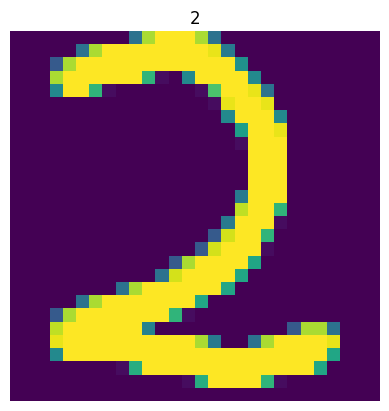

In [61]:
import cv2
img = cv2.imread("ima.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgdata = tf.keras.utils.normalize(img)
imgdata = imgdata.reshape(1,28, 28)
prediction = model.predict(imgdata)
plt.imshow(img)
plt.axis("off")
plt.title(str(np.argmax(prediction)))